<a href="https://colab.research.google.com/github/giuli-c/OCR/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Costruzione di un modello ibrido per il riconoscimento di caratteri OCR.
1. Il modello deve comprendere almeno un modello convoluzionale in input e successivamente un layer ricorrente.
2. Utilizzare un layer Reshape tra la parte convoluzionale e lo stato ricorrente.

In [6]:
# --- CODICE PER LIMITARE I WARNING
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from google.colab import files

In [26]:
df_train = pd.read_csv('./emnist_train.csv')
df_test = pd.read_csv('./emnist_test.csv')
df_train.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Unnamed: 0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.480,0.481
M,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,36,158,213,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,79,175,246,249,127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
W,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,4,5,21,32,37,37,32,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,22,82,114,127,127,129,172,203,217,217,203,122,67,2,0,0,0,0,0,0,0,0,0,0,0,0,2,65,...,0,0,0,0,0,0,0,0,0,0
d,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,38,82,112,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,47,159,216,233,244,206,22,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
h,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_test.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143,0.144
C,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,37,37,37,32,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,77,125,127,125,113,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,32,37,39,84,128,220,249,250,249,243,163,33,7,0,0,0,0,0,0,0,0,0,0,0,0,0,4,33,185,217,217,233,246,254,252,251,252,254,244,126,46,0,0,0,0,0,0,0,0,0,0,0,0,0,9,50,218,250,250,252,253,251,233,222,236,249,251,171,83,3,0,0,0,0,0,0,0,0,0,0,1,7,60,132,246,254,254,247,232,171,84,54,133,209,253,231,169,20,2,0,0,0,0,0,0,0,0,0,10,34,131,187,252,254,254,222,176,83,22,12,84,173,252,240,190,27,3,0,0,0,0,0,0,0,0,20,123,175,244,251,254,254,250,139,52,3,0,0,39,129,250,222,140,9,0,0,0,0,0,0,0,0,3,83,230,250,254,254,254,252,233,82,21,0,0,0,37,127,250,217,127,4,0,0,0,0,0,0,0,1,10,128,245,254,254,254,254,250,220,50,9,0,0,0,37,127,250,217,127,4,0,0,0,0,0,0,1,35,91,221,254,254,255,255,254,232,170,21,2,0,0,0,37,127,250,217,127,4,0,0,0,0,0,2,20,158,218,253,254,254,254,254,251,171,83,3,0,0,0,0,37,127,250,217,127,4,0,0,0,0,0,4,32,202,243,254,254,255,254,254,244,126,46,0,0,0,0,0,37,127,250,217,127,4,0,0,0,0,0,4,37,215,249,254,254,254,253,245,163,33,7,0,0,0,0,0,37,127,250,217,127,4,0,0,0,0,0,2,20,158,218,251,252,250,218,163,35,1,0,0,0,0,0,0,39,129,250,215,125,4,0,0,0,0,0,0,7,90,159,231,233,220,158,90,9,0,0,0,0,0,0,0,51,140,250,203,114,4,0,0,0,0,0,0,0,7,22,80,80,50,20,7,0,0,0,0,0,0,0,4,114,203,250,140,51,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,4,127,217,250,127,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,129,217,249,125,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,21,172,233,233,82,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,32,203,244,218,50,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
t,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,32,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,194,76,0,0,0,0,0,0,4,9,32,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,206,165,7,2,21,50,125,140,204,222,245,201,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,217,251,147,172,233,250,254,254,254,254,246,154,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,217,254,251,252,251,238,251,233,217,203,127,22,0,0,0,0,0,0,0,0,0,0,0,0,0,3,34,133,236,255,247,208,83,29,68,21,5,4,0,0,0,0,0,0,0,0,0,0,0,0,2,5,34,84,204,246,254,254,176,48,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,5,77,172,216,245,250,245,223,249,250,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,46,125,129,220,252,253,243,177,114,71,222,250,37,0,0,0,0,0,0,0,0,0,0,0,0,0,90,220,245,254,254,250,208,127,34,7,0,21,172,250,37,0,0,0,0,0,0,0,0,0,0,0,0,3,199,248,188,127,125,50,8,0,0,0,0,2,82,247,39,0,0,0,0,0,0,0,0,0,0,0,0,0,77,125,66,4,4,0,0,0,0,0,0,0,38,247,80,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,143,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..

Il dataframe è costituito dalle feature delle immagini.\
Si tratta di una matrice 28*28 ma è un'immagine!\
'char' è la colonna che mi definisce la label e la prima colonna mi definisce il corrispondente valore numerico associato.

In [46]:
df_train.index
print(df_test.index)

MultiIndex([('C', 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('t', 46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('J', 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('N', 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('P', 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('X', 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('S', 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('b', 37, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('C', 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('f', 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ...
            ('X', 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('N', 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...),
            ('T', 29, 0, 0, 0, 0, 0,

In [32]:
df_train = df_train.reset_index()

In [47]:
df_test = df_test.reset_index()

In [33]:
df_train.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,665,666,667,668,669,670,671,672,673,674
0,M,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,W,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,h,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_train.columns = ['char'] + list(range(0, df_train.shape[1] - 1))
df_test.columns = ['char'] + list(range(0, df_test.shape[1] - 1))

In [43]:
df_train.head()

,char,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,M,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,D,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,W,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,d,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,h,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_train['char']

,char
0,M
1,D
2,W
3,d
4,h
...,...
101989,M
101990,H
101991,N
101992,V


In [116]:
label_dict = {}

# Numeri da 0 a 9
for i in range(10):
    label_dict[i] = str(i)

# Lettere maiuscole da A a Z (10–35)
for i, letter in enumerate("ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    label_dict[i + 10] = letter

# Lettere minuscole specificate (36–45)
minuscole = ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']
for i, letter in enumerate(minuscole):
    label_dict[i + 36] = letter

label_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

## PREPROCESSING

In [82]:
# definisco le dimensioni di un'immagine
H,W = 28,28
X = df_train.iloc[:,2:]
# : tutte le righe, seleziono solo le colonne dalla 3 in poi (0: char, 1: valori | non le considero)

In [83]:
# RESHAPE DELL'IMMAGINE
def reshape_rotate_img(image):
  image = image.reshape(H,W)
  image = np.fliplr(image)
  image = np.rot90(image)
  return image

In [84]:
image = df_train.iloc[1, 2:]
label = df_train.iloc[1]['char']
print(image.shape, label)

(784,) D


In [85]:
X = np.apply_along_axis(reshape_rotate_img, 1, X.values.astype('float32'))

In [86]:
type(X)

numpy.ndarray

In [111]:
# NORMALIZZAZIONE A 255
X = X/255

In [89]:
X.shape # 3D BATCH

(101994, 28, 28)

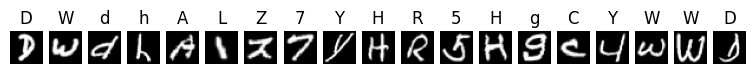

In [90]:
## Faccio la stampa delle immagini
plt.figure(figsize=(10,10))
for i in range(1, 20):
  plt.subplot(1,20,i)
  plt.imshow(X[i], cmap=plt.cm.gray)
  plt.title(df_train.iloc[i]['char'])
  plt.axis('off') # serve per nascondere gli assi (x e y) nel grafico corrente. USATO NELLE IMMAGINI.
# >> mi serve una rotazione!!

In [93]:
from tensorflow.keras.utils import to_categorical

# TRAIN TEST SPLIT > mi serve la y
y = df_train.iloc[:,1] # prendo come label il valore numerico associato alla lettera
# Si tratta di un problema di classificazione! Prendo il numero di classi
n_classes = len(y.unique())
# Quando sono in un problema di classificazione con + di 2 classi devo usare la 'categorical crossentropy' e usare quindi to_categorical per la y codificata > ma visto che lavoro con le immagini è già codificata.
y = to_categorical(y, num_classes=n_classes)

In [96]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X, y, test_size=0.1, random_state=1)

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, BatchNormalization, Flatten
from keras.layers import Bidirectional, LSTM

## COSTRUZIONE DEL MODELLO
Tecniche utilizzate:
- Normalizzazione del bias
- Dropout

In [107]:
model = Sequential()
# ------------ MODELLO CONVOLUZIONALE IN INPUT
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same',
                 activation='relu', input_shape=(H,W,1)))
# ➤ Output shape: (28, 28, 16)
model.add(BatchNormalization()),
# ➤ Output shape: (28, 28, 16) [stessa]
model.add(MaxPool2D(pool_size=(2,2), strides=2))
# ➤ Output shape: (14, 14, 16)
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',
                 activation='relu'))
# ➤ Output shape: (14, 14, 32)
model.add(BatchNormalization()),
# >> HO UN TENSORE 3D
model.add(layers.Reshape(target_shape=((14, 14 * 32)), name='reshape'))
# ➤ Output shape: (14, 448)
# Cioè 14 timestep, ciascuno con 448 feature

# -------------- Successivamente un LAYER RICORRENTE
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout = 0.2)))
# ➤ Output shape: (14, 128)  ← 64 forward + 64 backward
model.add(Bidirectional(LSTM(64, return_sequences=True, dropout = 0.2)))
# ➤ Output shape: (14, 128)
model.add(Flatten())
# ➤ Output shape: (128,)
model.add(Dense(128, activation='relu'))
# ➤ Output: (128,)
model.add(Dense(n_classes, activation='softmax'))
# ➤ Output: (n_classes,) → es: (10,)

In [108]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 14, 448)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 14, 128)        │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 14, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       229,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,031 (2.30 MB)

 Trainable params: 601,935 (2.30 MB)

 Non-trainable params: 96 (384.00 B)

In [109]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(optimizer='adam',loss='categorical_crossentropy')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

In [110]:
model.fit(xtrain,
          ytrain,
          epochs=30,
          batch_size=32,
          validation_data=(xval, yval),
          callbacks=[early_stopping])

Epoch 1/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 320s 108ms/step - loss: 0.9395 - val_loss: 0.3886
Epoch 2/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 322s 108ms/step - loss: 0.3862 - val_loss: 0.3610
Epoch 3/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 306s 102ms/step - loss: 0.3351 - val_loss: 0.3342
Epoch 4/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 308s 98ms/step - loss: 0.3050 - val_loss: 0.3834
Epoch 5/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 321s 97ms/step - loss: 0.2821 - val_loss: 0.3216
Epoch 6/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 341s 104ms/step - loss: 0.2631 - val_loss: 0.3210
Epoch 7/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 315s 101ms/step - loss: 0.2567 - val_loss: 0.3189
Epoch 8/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 324s 102ms/step - loss: 0.2431 - val_loss: 0.3238
Epoch 9/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 379s 122ms/step - loss: 0.2300 - val_loss: 0.3229
Epoch 10/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 329s 115ms/step - loss: 0.2255 - val_loss: 0.3179
Epoch 11/30
2869/2869 ━━━━━━━━━━━━━━━━━━━━ 336s 99ms/step - loss: 0.2118 - val_lo

In [117]:
def show_image(X, y_pred):
  ## Faccio la stampa delle immagini
  plt.figure(figsize=(10,10))
  for i in range(1, 20):
    plt.subplot(1,20,i)
    plt.imshow(X[i], cmap=plt.cm.gray)
    plt.title(label_dict[y_pred[i].argmax()])
    plt.axis('off') # serve per nascondere gli assi (x e y) nel grafico corrente. USATO NELLE IMMAGINI.
  # >> mi serve una rotazione!!

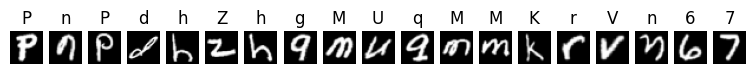

In [118]:
show_image(xval, yval)

In [120]:
model.evaluate(xval,yval)

319/319 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.3480


0.3518648147583008

## Faccio il test con il dataset di test

In [121]:
X_test = df_test.iloc[:,2:]
X_test = np.apply_along_axis(reshape_rotate_img, 1, X_test.values.astype('float32'))
# NORMALIZZAZIONE A 255
X_test = X_test/255


In [122]:
y_test = df_test.iloc[:,1]
# Si tratta di un problema di classificazione! Prendo il numero di classi
n_classes = len(y_test.unique())
# Quando sono in un problema di classificazione con + di 2 classi devo usare la 'categorical crossentropy' e usare quindi to_categorical per la y codificata > ma visto che lavoro con le immagini è già codificata.
y_test = to_categorical(y_test, num_classes=n_classes)

In [123]:
model.evaluate(X_test, y_test)

284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.3717


0.3708343505859375

284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


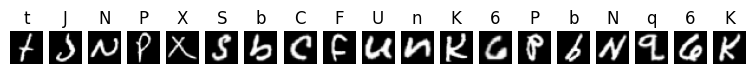

In [124]:
y_pred = model.predict(X_test)
show_image(X_test, y_pred)